# Análise de Dados com Python

### Desafio:

Você trabalha em uma empresa de telecom e tem clientes de vários serviços diferentes, entre os principais: internet e telefone.

O problema é que, analisando o histórico dos clientes dos últimos anos, você percebeu que a empresa está com taxa de cancelamento de mais de 26% dos clientes.

Isso representa uma perda de milhões para a empresa.

O que a empresa precisa fazer para resolver isso?

Base de dados: https://www.kaggle.com/radmirzosimov/telecom-users-dataset

# Passo a passo
***



1.   Importar a base de dados
2.   Visualizar a base de dados para entender o que temos disponível
3.   Realizar o tratamento dos dados (importante)
4.   Verificar como está a distribuição de cancelamentos
5.   Fazer uma análise das causas dos cancelamentos
6. Conclusões



# Importar a base de dados

In [76]:
import pandas as pd
import plotly.express as px
import seaborn as sns

# Visualizar o que há disponível na base

In [ ]:
tabela_clientes = pd.read_csv('/content/drive/MyDrive/bases_de_dados/telecom_users.csv')
tabela_clientes.head()

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN


In [ ]:
# removendo colunas que não serão utilizadas
tabela_clientes = tabela_clientes.drop(columns=['Unnamed: 0'])

# Tratamento dos dados

In [ ]:
tabela_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5986 non-null   object 
 1   Genero                  5986 non-null   object 
 2   Aposentado              5986 non-null   int64  
 3   Casado                  5986 non-null   object 
 4   Dependentes             5985 non-null   object 
 5   MesesComoCliente        5986 non-null   int64  
 6   ServicoTelefone         5986 non-null   object 
 7   MultiplasLinhas         5986 non-null   object 
 8   ServicoInternet         5986 non-null   object 
 9   ServicoSegurancaOnline  5986 non-null   object 
 10  ServicoBackupOnline     5986 non-null   object 
 11  ProtecaoEquipamento     5986 non-null   object 
 12  ServicoSuporteTecnico   5986 non-null   object 
 13  ServicoStreamingTV      5986 non-null   object 
 14  ServicoFilmes           5986 non-null   

In [ ]:
# transformando o tipo de TotalGasto em numeric
tabela_clientes['TotalGasto'] = pd.to_numeric(tabela_clientes['TotalGasto'], errors='coerce')
tabela_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5986 non-null   object 
 1   Genero                  5986 non-null   object 
 2   Aposentado              5986 non-null   int64  
 3   Casado                  5986 non-null   object 
 4   Dependentes             5985 non-null   object 
 5   MesesComoCliente        5986 non-null   int64  
 6   ServicoTelefone         5986 non-null   object 
 7   MultiplasLinhas         5986 non-null   object 
 8   ServicoInternet         5986 non-null   object 
 9   ServicoSegurancaOnline  5986 non-null   object 
 10  ServicoBackupOnline     5986 non-null   object 
 11  ProtecaoEquipamento     5986 non-null   object 
 12  ServicoSuporteTecnico   5986 non-null   object 
 13  ServicoStreamingTV      5986 non-null   object 
 14  ServicoFilmes           5986 non-null   

In [ ]:
# removendo a coluna Código que possui todos os valores vazios
tabela_clientes = tabela_clientes.dropna(how='all', axis=1)
tabela_clientes.dropna(inplace=True)
tabela_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5974 non-null   object 
 1   Genero                  5974 non-null   object 
 2   Aposentado              5974 non-null   int64  
 3   Casado                  5974 non-null   object 
 4   Dependentes             5974 non-null   object 
 5   MesesComoCliente        5974 non-null   int64  
 6   ServicoTelefone         5974 non-null   object 
 7   MultiplasLinhas         5974 non-null   object 
 8   ServicoInternet         5974 non-null   object 
 9   ServicoSegurancaOnline  5974 non-null   object 
 10  ServicoBackupOnline     5974 non-null   object 
 11  ProtecaoEquipamento     5974 non-null   object 
 12  ServicoSuporteTecnico   5974 non-null   object 
 13  ServicoStreamingTV      5974 non-null   object 
 14  ServicoFilmes           5974 non-null   

# Distribuição de cancelamentos

In [ ]:
tabela_clientes['Churn'].value_counts(normalize = True).apply('{:.2%}'.format)

Nao    73.43%
Sim    26.57%
Name: Churn, dtype: object

# Análise de causas dos cancelamentos

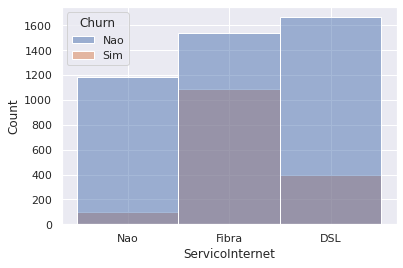

In [88]:
sns.set_theme(style='darkgrid')
sns.histplot(data=tabela_clientes, x='ServicoInternet', hue='Churn')

In [ ]:
grafico = px.histogram(tabela_clientes, x='ServicoInternet', color='Churn', width=500, height=400,
                       labels={
                           'ServicoInternet': 'Serviço de Internet',
                           'Churn': 'Cancelou'
                       },
                       title={
                           'text': 'Cancelamentos por serviço de Internet',
                           'y':0.9,
                            'x':0.5,
                           'xanchor': 'center',
                            
                       },)
grafico.show()

In [ ]:
# utilizando um for para criar todas os gráficos dinâmicamente
for coluna in tabela_clientes:
    if coluna == 'IDCliente':
        continue
    grafico = px.histogram(tabela_clientes, x=coluna, color='Churn', width=500,
                           height=400, labels={
                               'Churn': 'Cancelou? '
                           })
    grafico.show()

# Conclusões e Ações

Conclusões desta análise:





*   A empresa tem dificuldade em reter os clientes. As taxas de cancelamento nos 10 primeiros meses são grandes.
*   Há um problema nos serviços de Fibra, os clientes de Fibra cancelam muito
mais que os clientes de outros serviços.
*   Clientes que possuem vários serviços tem MUITO menos chance de cancelar
*   Clientes com contrato mensal cancelam MUITO mais que os outros modos
*   Clientes que utilizam boleto como forma de pagamento tendem a cancelar mais




